# Exploratory Data Analysis

## Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

## Load data
The cleaned and prepared dataset is loaded to begin the exploratory analysis.

In [2]:
df = pd.read_pickle('../data/processed/pkl_retail_data_cleaned.pkl')
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products,Month,Year
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,2023-09-18,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts,September,2023
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,2023-12-31,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab,December,2023
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,2023-04-26,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment,April,2023
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,2023-05-08,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife,May,2023
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,2024-01-10,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies,January,2024


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293908 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    293908 non-null  float64       
 1   Customer_ID       293908 non-null  float64       
 2   Name              293908 non-null  object        
 3   Email             293908 non-null  object        
 4   Phone             293908 non-null  float64       
 5   Address           293908 non-null  object        
 6   City              293908 non-null  object        
 7   State             293908 non-null  object        
 8   Zipcode           293908 non-null  float64       
 9   Country           293908 non-null  object        
 10  Age               293908 non-null  float64       
 11  Gender            293908 non-null  object        
 12  Income            293908 non-null  object        
 13  Customer_Segment  293908 non-null  object        
 14  Date     

In [4]:
df['Date']

0        2023-09-18
1        2023-12-31
2        2023-04-26
3        2023-05-08
4        2024-01-10
            ...    
302005   2024-01-20
302006   2023-12-28
302007   2024-02-27
302008   2023-09-03
302009   2024-01-08
Name: Date, Length: 293908, dtype: datetime64[ns]

## Sales Trend Analysis
This section explores sales patterns over time to identify peaks, declines, and seasonal behavior.  
Visualizing sales by month and year helps uncover trends that may influence customer demand and business planning.

In [5]:
sales_trend = df.groupby(by = ['Year', 'Month'])['Total_Amount'].sum().reset_index()

In [6]:
sales_trend

,Year,Month,Total_Amount
0,2023,April,3.320141e+07
1,2023,August,3.434418e+07
2,2023,December,3.381805e+07
3,2023,July,3.400006e+07
4,2023,June,3.290478e+07
5,2023,March,3.433186e+07
6,2023,May,3.362230e+07
7,2023,November,3.287899e+07
8,2023,October,3.368290e+07
9,2023,September,3.304649e+07


In [7]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']
sales_trend['Month'] = pd.Categorical(sales_trend['Month'], categories=month_order, ordered=True)

sales_trend = sales_trend.sort_values(['Year', 'Month'])
sales_trend

,Year,Month,Total_Amount
5,2023,March,3.433186e+07
0,2023,April,3.320141e+07
6,2023,May,3.362230e+07
4,2023,June,3.290478e+07
3,2023,July,3.400006e+07
1,2023,August,3.434418e+07
9,2023,September,3.304649e+07
8,2023,October,3.368290e+07
7,2023,November,3.287899e+07
2,2023,December,3.381805e+07


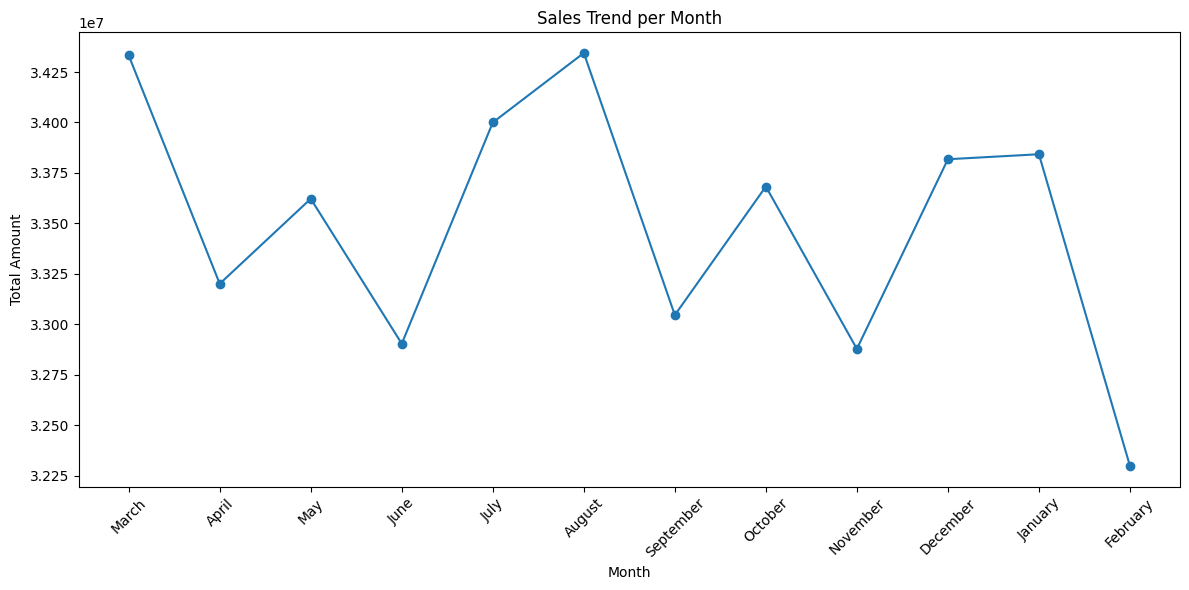

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))


plt.plot(sales_trend["Month"], sales_trend["Total_Amount"], marker='o')

plt.title("Sales Trend per Month")
plt.xlabel("Month")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sales in 2023 stay quite steady, moving only a little between 32.8M and 34.4M. August has the highest sales, while November has the lowest, but the difference is small.
In 2024, January shows strong sales at 33.84M, and February is a bit lower at 32.29M. Overall, the sales trend looks stable without big changes.

### MoM Sales Growth

In [9]:
sales_trend["MoM_Growth"] = sales_trend["Total_Amount"].pct_change() * 100
sales_trend

,Year,Month,Total_Amount,MoM_Growth
5,2023,March,3.433186e+07,NaN
0,2023,April,3.320141e+07,-3.292733
6,2023,May,3.362230e+07,1.267699
4,2023,June,3.290478e+07,-2.134063
3,2023,July,3.400006e+07,3.328647
1,2023,August,3.434418e+07,1.012108
9,2023,September,3.304649e+07,-3.778490
8,2023,October,3.368290e+07,1.925793
7,2023,November,3.287899e+07,-2.386701
2,2023,December,3.381805e+07,2.856126


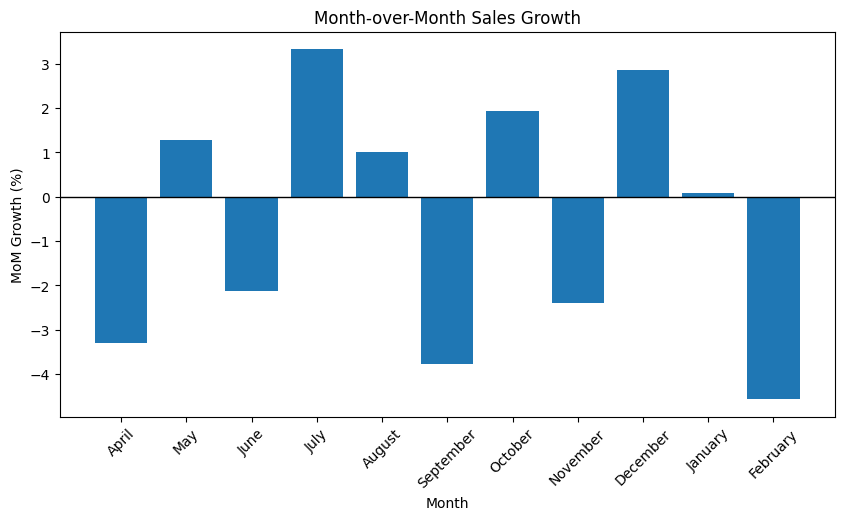

In [10]:
plt.figure(figsize=(10,5))
plt.bar(sales_trend["Month"].astype(str), sales_trend["MoM_Growth"])
plt.xlabel("Month")
plt.ylabel("MoM Growth (%)")
plt.title("Month-over-Month Sales Growth")
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=1)
plt.show()

The largest decline occurred in February 2024 (-4.56%), indicating a significant slowdown in sales at the beginning of the year.

The highest increase occurred in July 2023 (+3.33%), showing that sales performance improved noticeably in the middle of the year.

In [11]:
feb = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month == 2)]
jan = df[(df['Date'].dt.year == 2024) & (df['Date'].dt.month == 1)]
transactions_feb = len(feb)
transactions_jan = len(jan)

print("Transactions Jan:", transactions_jan)
print("Transactions Feb:", transactions_feb)

transaction_change = ((transactions_feb - transactions_jan) / transactions_jan) * 100
print("Transaction Count MoM:", transaction_change)


Transactions Jan: 24982
Transactions Feb: 23550
Transaction Count MoM: -5.732127131534705


In [12]:
total_feb = feb['Total_Amount'].sum()
total_jan = jan['Total_Amount'].sum()

aov_jan = total_jan / transactions_jan
aov_feb = total_feb / transactions_feb

print("AOV Jan:", aov_jan)
print("AOV Feb:", aov_feb)

aov_change = ((aov_feb - aov_jan) / aov_jan) * 100
print("AOV Change:", aov_change)

AOV Jan: 1354.6858251519807
AOV Feb: 1371.5300579428629
AOV Change: 1.243405111217758


The total number of transactions in January was 5.7% higher than in February, while February recorded a higher AOV. This indicates that the decline in revenue was not driven by customers spending less per transaction, but rather by a decrease in the overall number of transactions.

In [13]:
data = {
    'Month': ['January', 'February'],
    'Year': [2024, 2024],
    'Total_Amount': [33842760, 32299530],
    'Transaction_Count': [24982, 23550],
    'Days_in_Month': [31, 29]
}

df = pd.DataFrame(data)

# Average Daily Transactions
df['ADT'] = df['Transaction_Count'] / df['Days_in_Month']

# Average Daily Revenue
df['ADR'] = df['Total_Amount'] / df['Days_in_Month']

# MoM Growth (daily adjusted)
df['ADT_MoM'] = df['ADT'].pct_change() * 100
df['ADR_MoM'] = df['ADR'].pct_change() * 100

df

,Month,Year,Total_Amount,Transaction_Count,Days_in_Month,ADT,ADR,ADT_MoM,ADR_MoM
0,January,2024,33842760,24982,31,805.870968,1.091702e+06,NaN,NaN
1,February,2024,32299530,23550,29,812.068966,1.113777e+06,0.769105,2.022069


Average Daily Transactions (ADT) increased from 805.87 to 812.07, showing a +0.77% improvement.
Average Daily Revenue (ADR) also increased from 1.09M to 1.11M, representing a +2.02% growth.

This indicates that the apparent decline in total monthly revenue was primarily caused by February having fewer days, not by weaker customer activity or reduced spending.

## Product Performance
Product-level analysis is performed to understand which categories, brands,and type products generate the most sales.  
This helps identify top-performing items as well as products with low demand.

### Make pivot table

In [16]:
df = pd.read_pickle('../data/processed/pkl_retail_data_cleaned.pkl')
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,2023-09-18,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,2023-12-31,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,2023-04-26,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,2023-05-08,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,2024-01-10,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [17]:
product_category_df = df.groupby(['Product_Category'])['Total_Amount'].sum().reset_index()
product_category_df

,Product_Category,Total_Amount
0,Books,7.272673e+07
1,Clothing,7.293099e+07
2,Electronics,9.501178e+07
3,Grocery,8.896370e+07
4,Home Decor,7.234013e+07


In [18]:
Product_Brand_df = df.groupby(['Product_Brand'])['Total_Amount'].sum().reset_index()
Product_Brand_df

,Product_Brand,Total_Amount
0,Adidas,2.423228e+07
1,Apple,2.396481e+07
2,Bed Bath & Beyond,2.427537e+07
3,BlueStar,2.992519e+06
4,Coca-Cola,2.446867e+07
5,HarperCollins,2.433139e+07
6,Home Depot,2.415726e+07
7,IKEA,2.390750e+07
8,Mitsubhisi,9.008944e+06
9,Nestle,2.407735e+07


In [19]:
Product_Type_df = df.groupby(['Product_Type'])['Total_Amount'].sum().reset_index()
Product_Type_df

,Product_Type,Total_Amount
0,Bathroom,8.075123e+06
1,Bedding,7.911124e+06
2,BlueStar AC,2.992519e+06
3,Children's,8.041021e+06
4,Chocolate,8.114278e+06
5,Coffee,8.198729e+06
6,Decorations,1.616089e+07
7,Dress,8.091461e+06
8,Fiction,2.406426e+07
9,Fridge,9.884276e+06


In [20]:
product_analysis = df.groupby(['Product_Category', 'Product_Brand', 'Product_Type'])['Total_Amount'].sum().reset_index()
product_analysis

,Product_Category,Product_Brand,Product_Type,Total_Amount
0,Books,HarperCollins,Fiction,8.059954e+06
1,Books,HarperCollins,Non-Fiction,7.949590e+06
2,Books,HarperCollins,Thriller,8.321845e+06
3,Books,Penguin Books,Children's,8.041021e+06
4,Books,Penguin Books,Fiction,8.025676e+06
5,Books,Penguin Books,Non-Fiction,8.104219e+06
6,Books,Random House,Fiction,7.978627e+06
7,Books,Random House,Literature,8.150580e+06
8,Books,Random House,Non-Fiction,8.095214e+06
9,Clothing,Adidas,Jacket,7.889235e+06


### Product Category

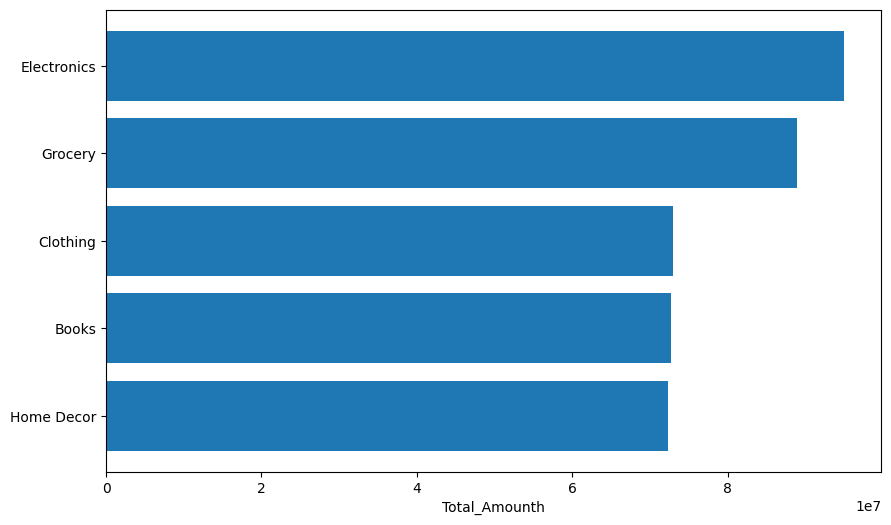

In [21]:
product_category_df = product_category_df.sort_values('Total_Amount')
plt.figure(figsize=(10,6))
plt.barh(product_category_df['Product_Category'], product_category_df['Total_Amount'])
plt.xlabel('Total_Amounth')
plt.show()

In the product performance analysis by category, it is evident that among the five available categories, Electronics and Grocery generate the highest amonth. This indicates that these two categories contribute the most overal revenue, either due to strong customer demand or higher transaction values compared to the other categories.

### Product Brand

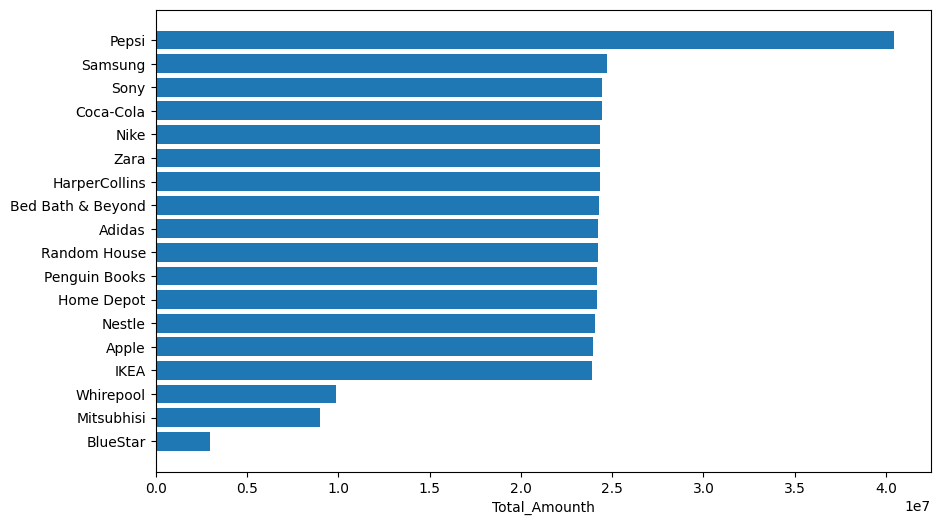

In [22]:
Product_Brand_df = Product_Brand_df.sort_values('Total_Amount')
plt.figure(figsize=(10,6))
plt.barh(Product_Brand_df['Product_Brand'], Product_Brand_df['Total_Amount'])
plt.xlabel('Total_Amounth')
plt.show()

In the brand performance analysis, BlueStar appears as the brand with the lowest revenue. Based on the dataset, Bluestar likely represent electronic products, which typically have lower sales volume compared to high demend FMCG brands like Pepsi. This may explain the smaller revenue contribution, as these products target a more niche market and have less frequent purchase cycles.

### Product Type

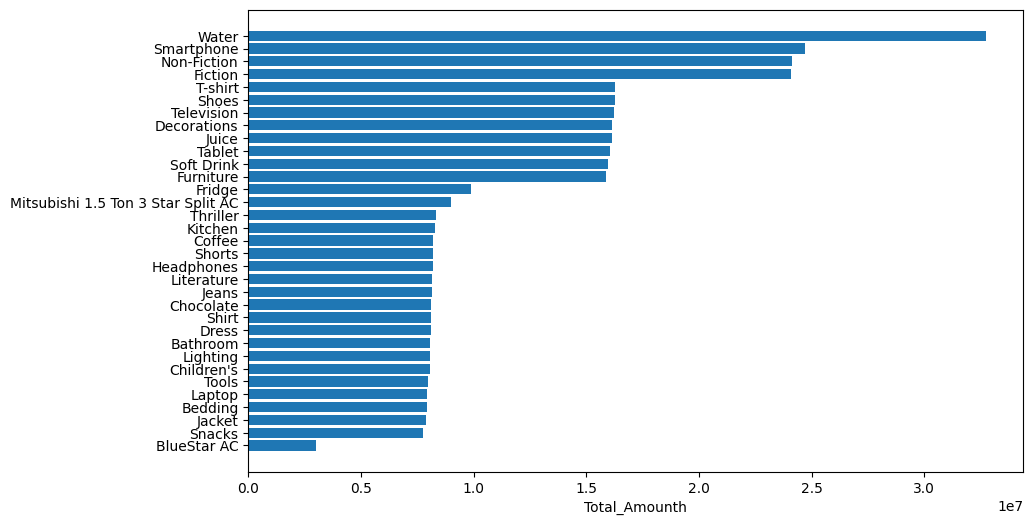

In [23]:
Product_Type_df = Product_Type_df.sort_values('Total_Amount')
plt.figure(figsize=(10,6))
plt.barh(Product_Type_df['Product_Type'], Product_Type_df['Total_Amount'])
plt.xlabel('Total_Amounth')
plt.show()

In the product performance analysis by product type, the water category generated the highest total amount, indicating strong demand and frequent purcahses.

On the other hand, BlueStar AC recorded the lowest total amount. This product type falls uder high value electronics with low purchase fequency, resulting in lower overall revenue compared to daily use items like water

## Geographic Analysis
Sales and customer distribution are analyzed across different cities, states, or country.  
This section helps identify high-performing locations and potential markets with lower engagement.

### Total Revenue per City

In [24]:
city_sales = df.groupby(['City']).agg(Total_Amount = ('Total_Amount', 'sum'),
                                      Transaction_Count = ('Transaction_ID', 'count')).sort_values(by='Total_Amount', ascending=False).head(10)
city_sales['AOV'] = city_sales['Total_Amount'] / city_sales['Transaction_Count']
city_sales

,Total_Amount,Transaction_Count,AOV
City,,,
Chicago,2.869261e+07,21109,1359.259744
Portsmouth,2.703614e+07,19648,1376.024872
San Francisco,1.616036e+07,11938,1353.690908
Frankfurt,1.363032e+07,9947,1370.294735
Boston,1.258083e+07,9187,1369.416465
New York,7.151475e+06,5321,1344.009560
Fort Worth,6.964606e+06,5090,1368.292022
London,5.895465e+06,4345,1356.838938
Plymouth,3.162265e+06,2236,1414.250713


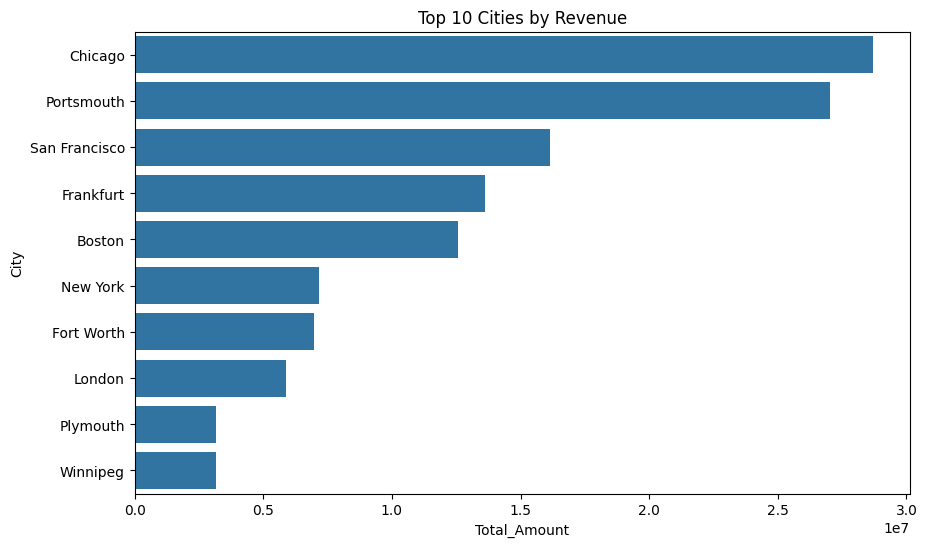

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(data=city_sales, x="Total_Amount", y="City")
plt.title("Top 10 Cities by Revenue")
plt.show()


In the analysis of total amount by city, the top 10 cities contributing the most to overall sales are Chicago, Portsmouth, San Francisco, Frankfurt, Boston, New York, Fort Worth, London, Plymouth, and Winnipeg.

Among these, Chicago and Portsmouth stand out with the highest total amount, indicating significantly stronger transaction activity compared to the other cities in the top group. This suggests higher customer volume, stronger purchasing power, or more effective market performance in those regions.

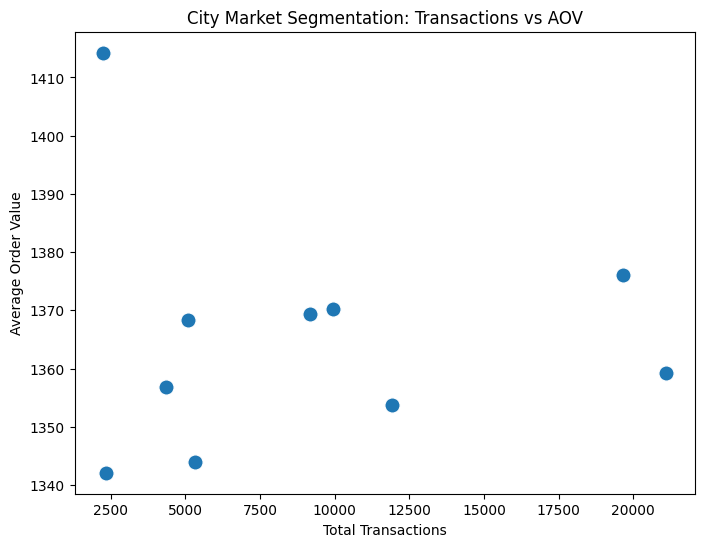

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=city_sales, x="Transaction_Count", y="AOV", s=120)
plt.title("City Market Segmentation: Transactions vs AOV")
plt.xlabel("Total Transactions")
plt.ylabel("Average Order Value")
plt.show()


Even though transaction counts vary widely. Chicago with 21,109 transactions versus Winnipeg with 2,355. AOV stays within a narrow range of $1,340–$1,414.
This indicates that average spending per transaction is not strongly influenced by how many transactions occur in a city.

Total revenue per city is driven primarily by transaction count, not AOV. Cities like Chicago and Portsmouth dominate because of their high purchase frequency, not because customers spend more per order.

### Total Revenue per State

In [27]:
state_sales = df.groupby(['State'])['Total_Amount'].sum().reset_index().sort_values(by='Total_Amount', ascending=False).head(10)
state_sales

,State,Total_Amount
9,England,8.441464e+07
4,Berlin,7.036581e+07
33,New South Wales,6.047821e+07
39,Ontario,6.014091e+07
7,Connecticut,2.866862e+07
20,Maine,1.622099e+07
11,Georgia,1.270357e+07
17,Kansas,7.166703e+06
32,New Mexico,6.962381e+06
34,New York,1.350771e+06


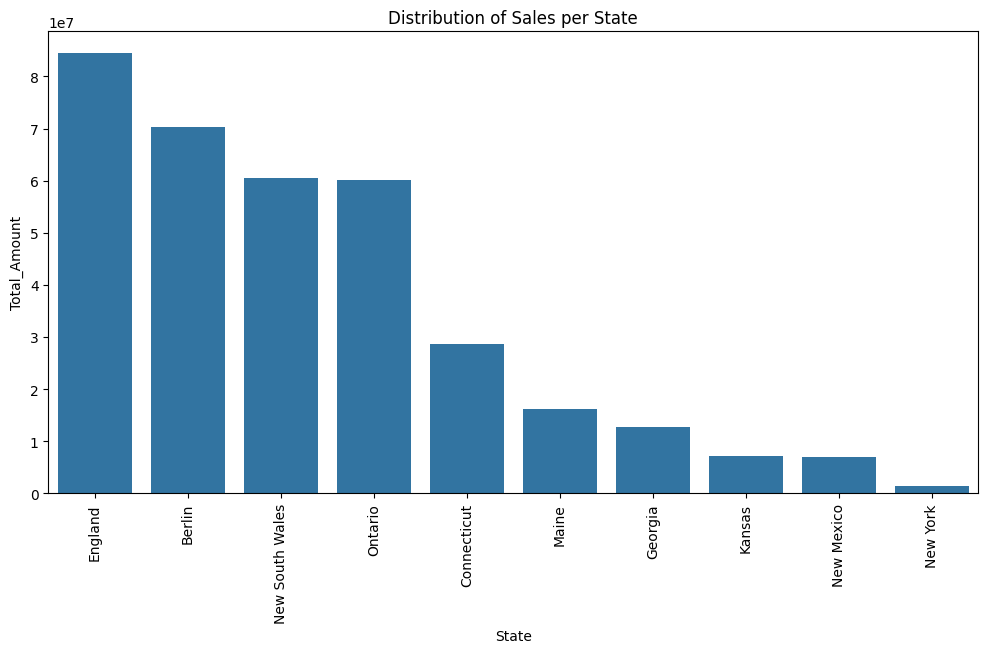

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(data=state_sales, x="State", y="Total_Amount")
plt.xticks(rotation=90)
plt.title("Distribution of Sales per State")
plt.show()


Revenue is heavily concentrated in a few key states—England, Berlin, New South Wales, and Ontario. While states like Kansas, New Mexico, and New York contribute significantly less to overall sales.

### Total Revenue per Country

In [29]:
country_sales = df.groupby(['Country', 'Year']).agg({'Total_Amount': 'sum',
                                             }).reset_index()
country_sales

,Country,Year,Total_Amount
0,Australia,2023.0,5.059514e+07
1,Australia,2024.0,9.883076e+06
2,Canada,2023.0,5.027368e+07
3,Canada,2024.0,9.867239e+06
4,Germany,2023.0,5.882760e+07
5,Germany,2024.0,1.153821e+07
6,UK,2023.0,7.045649e+07
7,UK,2024.0,1.395816e+07
8,USA,2023.0,1.056781e+08
9,USA,2024.0,2.089562e+07


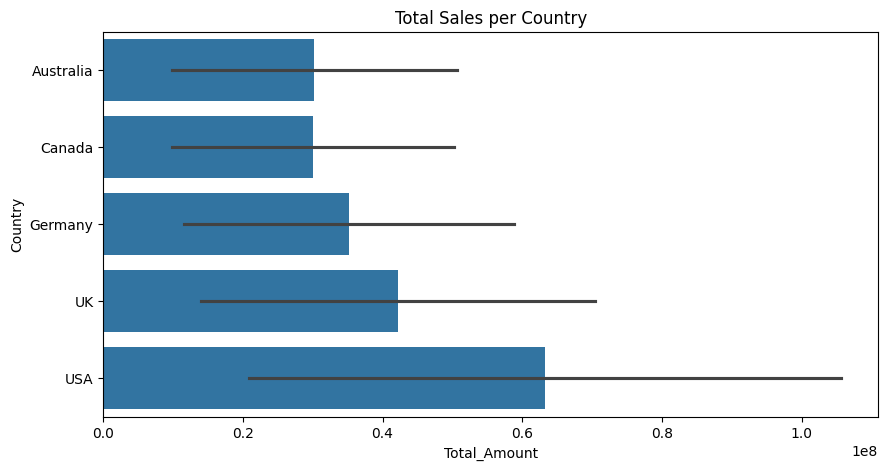

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=country_sales, x='Total_Amount', y='Country')
plt.title('Total Sales per Country')
plt.show()

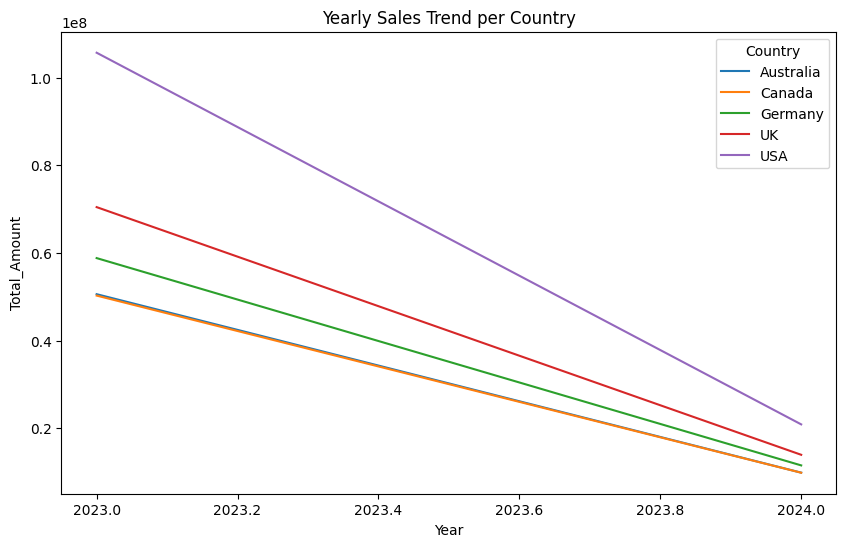

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=country_sales, x='Year', y='Total_Amount', hue='Country', markers='o')
plt.title('Yearly Sales Trend per Country')
plt.show()

Revenue in 2024 experiences a substantial and uniform drop across all countries. This pattern strongly indicates the presence of an overarching factor affecting the entire market rather than region specific trends.

## Payment & Shipping Method
This section examines the usage patterns of payment methods and shipping options.  
Understanding customer preferences helps optimize checkout flow and logistics strategies.

### popular shipping method

In [32]:
df['Shipping_Method'].unique()

array(['Same-Day', 'Standard', 'Express'], dtype=object)

In [33]:
shipping_method = df.groupby(['Shipping_Method'])['Transaction_ID'].count().reset_index()
shipping_method

,Shipping_Method,Transaction_ID
0,Express,99599
1,Same-Day,101540
2,Standard,92769


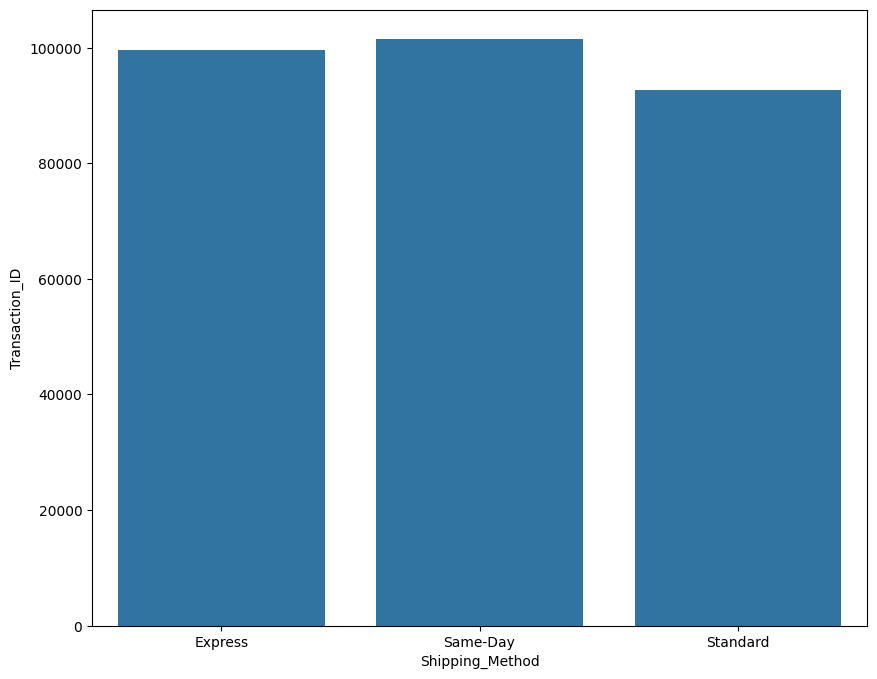

In [34]:
plt.figure(figsize=(10,8))
sns.barplot(data=shipping_method, x='Shipping_Method', y='Transaction_ID')
plt.show()

customers strongly prefer faster shipping options, highlighting the importance of delivery speed in driving customer satisfaction and purchase decisions.

### popular payment method

In [35]:
df['Payment_Method'].unique()

array(['Debit Card', 'Credit Card', 'PayPal', 'Cash'], dtype=object)

In [36]:
payment_method = df.groupby(['Payment_Method'])['Transaction_ID'].count().reset_index()
payment_method

,Payment_Method,Transaction_ID
0,Cash,71925
1,Credit Card,87780
2,Debit Card,74744
3,PayPal,59459


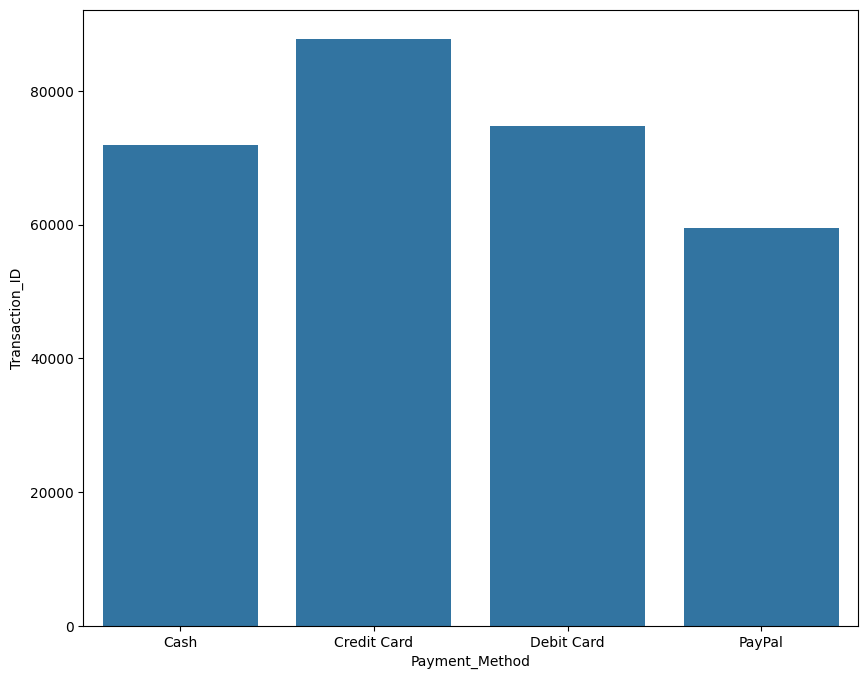

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(data=payment_method, x='Payment_Method', y='Transaction_ID')
plt.show()

The analysis reveals that Credit Card is the most preferred payment method, accounting for the highest transaction volume. Meanwhile, cash and debit card usage remain significant, indicating that a portion of the customer base still relies on traditional payment methods. PayPal shows the lowest adoption, suggesting the need for strategic evaluation or enhancement. These insights highlight opportunities to optimize checkout experience, enhance targeted promotions, and expand digital payment options based on customer behavior.

## Feedback & Satisfication
Customer ratings and feedback are analyzed to evaluate overall satisfaction levels.  
This helps identify strengths, recurring issues, and areas that may require service or product improvements.


### Ratings

In [38]:
rating = df['Ratings'].value_counts().sort_index()
rating

Ratings
1.0    42178
2.0    61018
3.0    46442
4.0    95459
5.0    48811
Name: count, dtype: int64

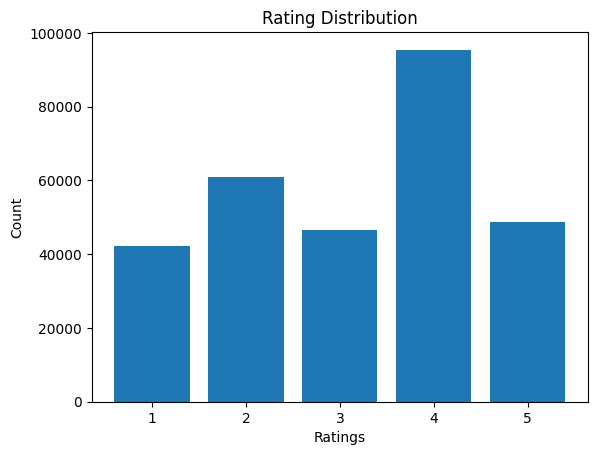

In [39]:
plt.bar(rating.index, rating.values)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

- Rating 4 is the most frequent, followed by rating 5—indicating that most customers are generally satisfied with their shopping experience.

- Ratings 1 and 2 are still significantly high, especially rating 2, which even exceeds rating 5. This suggests recurring issues such as product quality, delivery problems, or after-sales service.

- Rating 3 appears in large numbers, showing many customers feel neutral. This group has strong potential to be converted into satisfied customers with small improvements in service quality.

### Feedback

In [40]:
feedback = df['Feedback'].value_counts()
feedback 

Feedback
Excellent    98016
Good         92696
Average      61018
Bad          42178
Name: count, dtype: int64

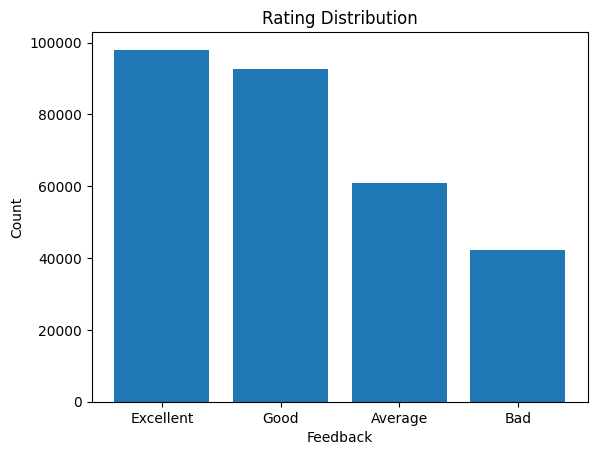

In [41]:
plt.bar(feedback.index, feedback.values)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

- Most customers provided “Excellent” and “Good” feedback, indicating that overall shopping experiences are generally positive.

- The number of “Average” feedbacks is still quite high, suggesting that many customers felt the experience was neutral and could be improved.

- “Bad” feedback is the lowest, but still important to address, as it may highlight recurring issues such as delivery delays, product quality concerns, or customer service problems.